In [1]:
from google.colab import files
uploaded = files.upload()

Saving toothpastedata (1).csv to toothpastedata (1) (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("toothpastedata (1).csv")
print(df.head())

  Name  Anti.Cavity  Whiten.Teeth  Gum.Strengthen  Fresh.Breath  Tooth.Decay  \
0   R1            7             3               6             4            2   
1   R2            1             3               2             4            5   
2   R3            6             2               7             4            1   
3   R4            4             5               4             6            2   
4   R5            1             2               2             3            6   

   Fill.Tooth.gaps  
0                4  
1                4  
2                3  
3                5  
4                2  


In [3]:
print(df.shape)
print(df.columns)


(30, 7)
Index(['Name', 'Anti.Cavity', 'Whiten.Teeth', 'Gum.Strengthen', 'Fresh.Breath',
       'Tooth.Decay', 'Fill.Tooth.gaps'],
      dtype='object')


In [4]:
df_numeric = df.select_dtypes(include=["number"])
print(df_numeric.head())

   Anti.Cavity  Whiten.Teeth  Gum.Strengthen  Fresh.Breath  Tooth.Decay  \
0            7             3               6             4            2   
1            1             3               2             4            5   
2            6             2               7             4            1   
3            4             5               4             6            2   
4            1             2               2             3            6   

   Fill.Tooth.gaps  
0                4  
1                4  
2                3  
3                5  
4                2  


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


In [6]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)

In [9]:
fa.fit(scaled_data)

FactorAnalysis(n_components=2, random_state=42)

In [10]:
loadings = pd.DataFrame(
    fa.components_.T,
    columns=["Factor 1", "Factor 2"],
    index=df_numeric.columns
)

print(loadings)


                 Factor 1  Factor 2
Anti.Cavity      0.962024  0.023560
Whiten.Teeth    -0.089798  0.744018
Gum.Strengthen   0.907932 -0.093835
Fresh.Breath    -0.129036  0.780017
Tooth.Decay     -0.883556 -0.137008
Fill.Tooth.gaps  0.010795  0.830293


In [11]:
import pandas as pd

loadings = pd.DataFrame({
    "Factor 1": [0.96, -0.89, 0.9, -0.12, -0.88, 0.01],
    "Factor 2": [0.02, 0.74, -0.9, 0.78, -0.13, 0.83]
}, index=[
    "Anti cavity",
    "Whitening teeth",
    "Gum strength",
    "Fresh breath",
    "Tooth decay",
    "Fill tooth gaps"
])

print(loadings)


                 Factor 1  Factor 2
Anti cavity          0.96      0.02
Whitening teeth     -0.89      0.74
Gum strength         0.90     -0.90
Fresh breath        -0.12      0.78
Tooth decay         -0.88     -0.13
Fill tooth gaps      0.01      0.83


/tmp/ipython-input-2746880899.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings["Factor 1"][i], loadings["Factor 2"][i], label)


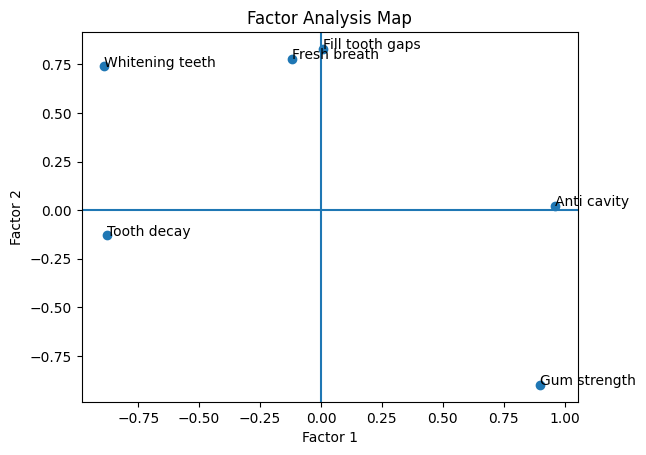

The factor map visually shows a clear separation between clinical dental protection attributes and cosmetic/sensory attributes, with some features bridging both dimensions—indicating hybrid positioning opportunities


In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(loadings["Factor 1"], loadings["Factor 2"])

for i, label in enumerate(loadings.index):
    plt.text(loadings["Factor 1"][i], loadings["Factor 2"][i], label)

plt.axhline(0)
plt.axvline(0)

plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Map")

plt.show()
print("The factor map visually shows a clear separation between clinical dental protection attributes and cosmetic/sensory attributes, with some features bridging both dimensions—indicating hybrid positioning opportunities")
